# Car Price Prediction

### Problem Statement
Analyse the Car Dataset and perform various operations. Also Try to understand the relationship of different independent variables with our target variable.

1. Data cleaning
2. Exploratory Data Analysis
3. Feature selection
4. Data Modelling and evaluation

In [1]:
# !conda activate CarPricePrediction

In [2]:
!conda env list

# conda environments:
#
base                     D:\Installed Software\anaconda3
CarPricePrediction    *  D:\Installed Software\anaconda3\envs\CarPricePrediction
laneDetection            D:\Installed Software\anaconda3\envs\laneDetection
naman                    D:\Installed Software\anaconda3\envs\naman
pyspark                  D:\Installed Software\anaconda3\envs\pyspark
tensorflow               D:\Installed Software\anaconda3\envs\tensorflow



In [3]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. Data Cleaning

In [4]:
# Reading the Data

data = pd.read_csv("CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.shape

(205, 26)

There are 26 Columns and 205 Rows

In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no null values in our data.

There are 8 rows of float data type, 8 rows of int data type and 10 rows of object data type.

#### Symboling is a categorical column

+3 = risky and -3 = safe

In [10]:
data.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [11]:
data['symboling']=data['symboling'].astype('str')

Drop the Unwanted Column


as we know ID will not play any role in Car Price Prediction, so we will drop it

In [12]:
data = data.drop('car_ID',axis=1)

In [13]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [14]:
data.CarName

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

#### Extracting car company from Car Name

In [15]:
Company = data.CarName.apply(lambda x: x.split(" ")[0])
data.insert(3, "Company", Company)

# Droping the old CarName Column
data.drop("CarName",axis=1,inplace=True)

data.head()

,symboling,fueltype,Company,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
data['Company'] = data.Company.str.lower()
data.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

As we can see there are lot of duplicate car company names with just different spelling
* toyota and toyouta
* mazda and maxda
* porcshce and porsche
* vokswagen , volkswagen and vw

Lets replace them

In [17]:
data['Company'] = data['Company'].replace({'maxda': 'mazda', 
                                           'porcshce': 'porsche', 
                                           'toyouta': 'toyota', 
                                           'vokswagen': 'volkswagen', 
                                           'vw': 'volkswagen'})

In [18]:
data['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [19]:
#Checking for duplicates
data.loc[data.duplicated()]

,symboling,fueltype,Company,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


There are no Duplicate Values

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   Company           205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### Lets categories the columns in categorical and numerical columns

#### Categorical Columns

In [21]:
categorical_cols = data.select_dtypes(include='object').columns

In [22]:
categorical_cols

Index(['symboling', 'fueltype', 'Company', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

#### Numerical Columns

In [23]:
numerical_cols = data.select_dtypes(exclude='object').columns
numerical_cols

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

## 2. EDA (Exploratory Data Analysis)

#### Visualising Categorical features

In [24]:
data.head()

,symboling,fueltype,Company,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Visualise different car company

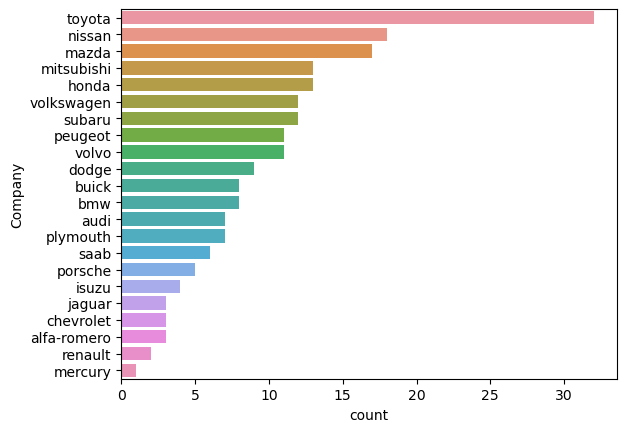

In [25]:
sns.countplot(data = data
            ,y = 'Company',
            order = data['Company'].value_counts().index
            );

So from above visulization we can say that,
* Toyoto is the most buyed car
* Mercury is the least buyed car

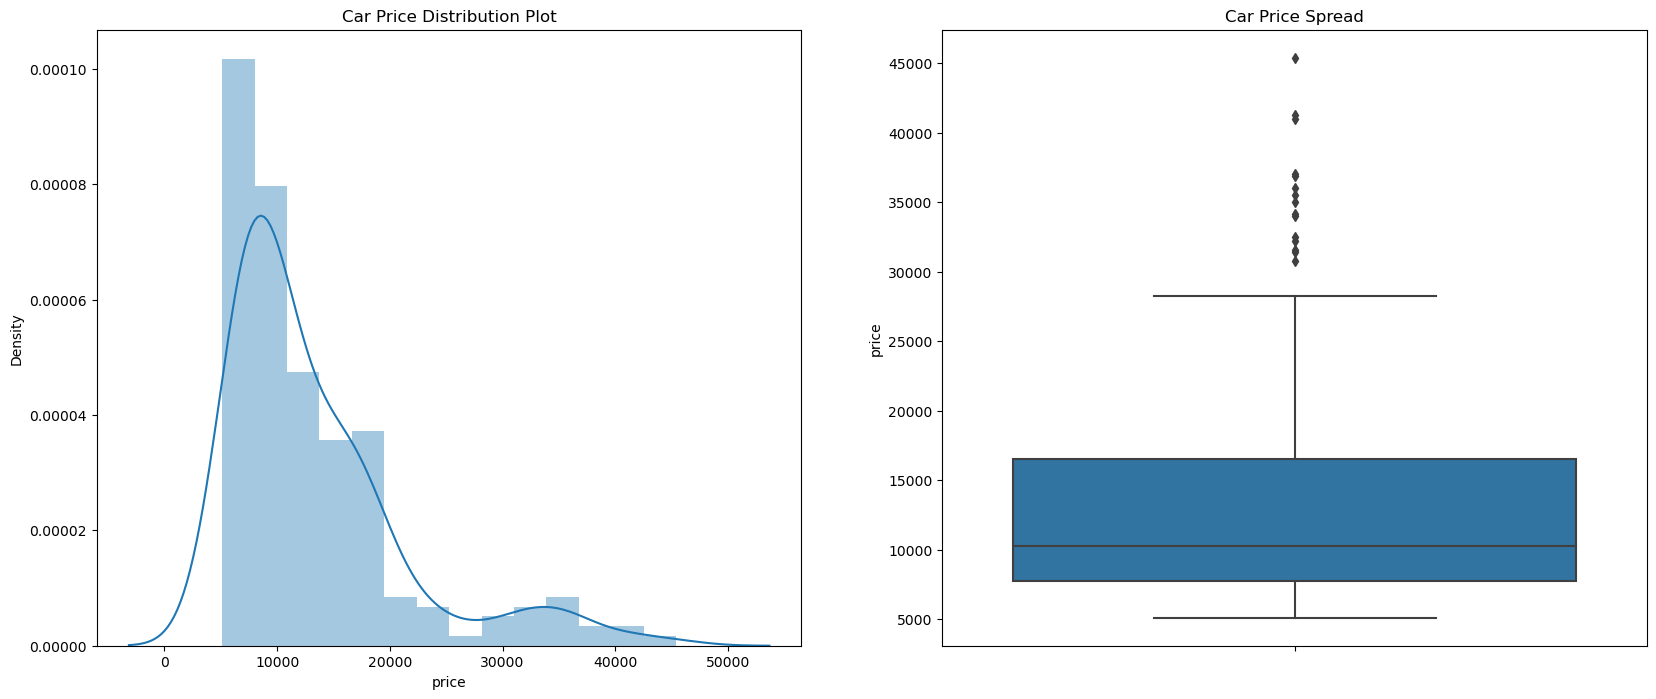

In [26]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

In [27]:
print(data.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


* The Plot is Right skewed, means the most price are below 15000.
* The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

In [28]:
data.columns

Index(['symboling', 'fueltype', 'Company', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [29]:
categorical_cols

Index(['symboling', 'fueltype', 'Company', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [30]:
numerical_cols

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

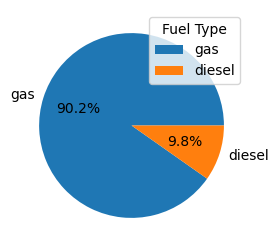

In [31]:
# pie chart to show the distribution of fueltype
plt.figure(figsize=(3,3))
plt.pie(x=data.fueltype.value_counts(),
        labels=data.fueltype.value_counts().index,
        autopct='%1.1f%%')
plt.legend(title="Fuel Type")
plt.show()

By Above plot we can say that most car use Gas as Fuel

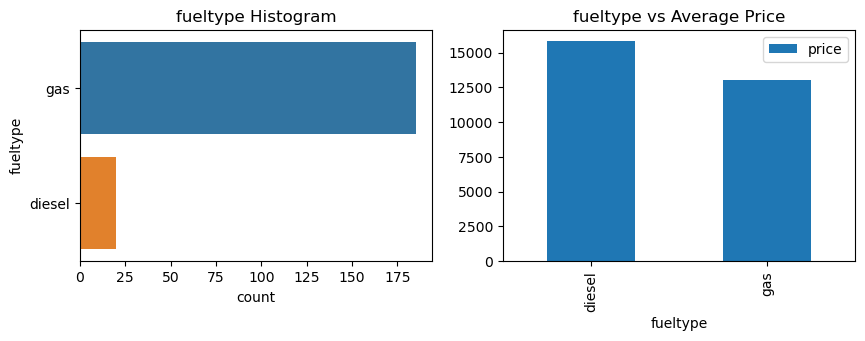

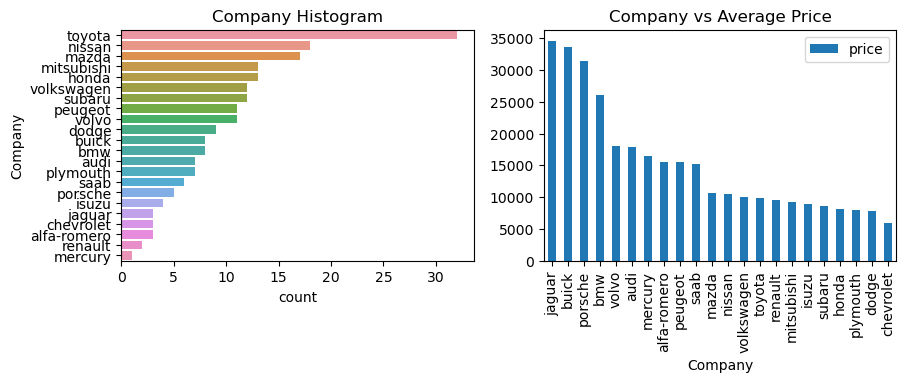

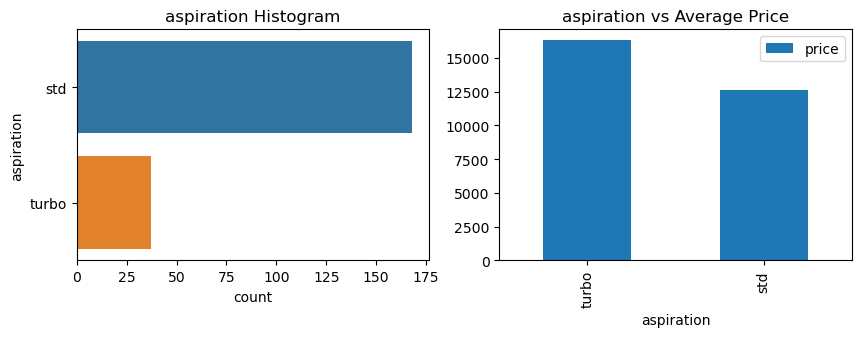

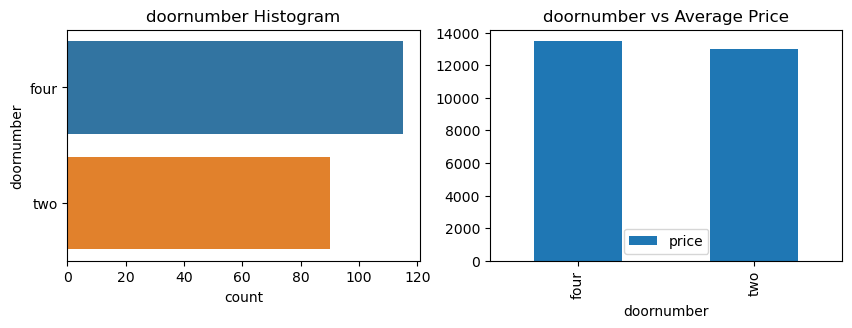

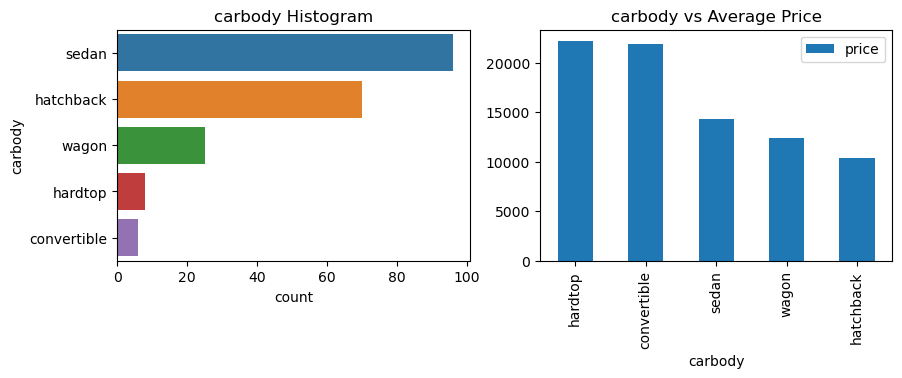

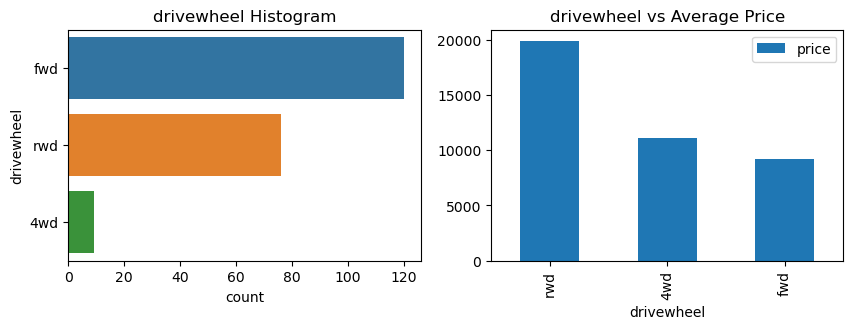

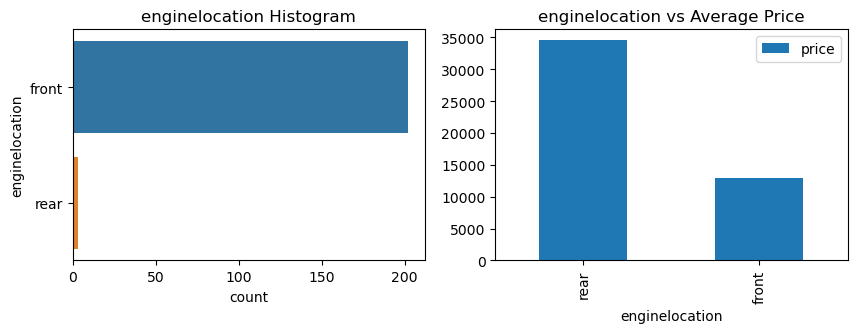

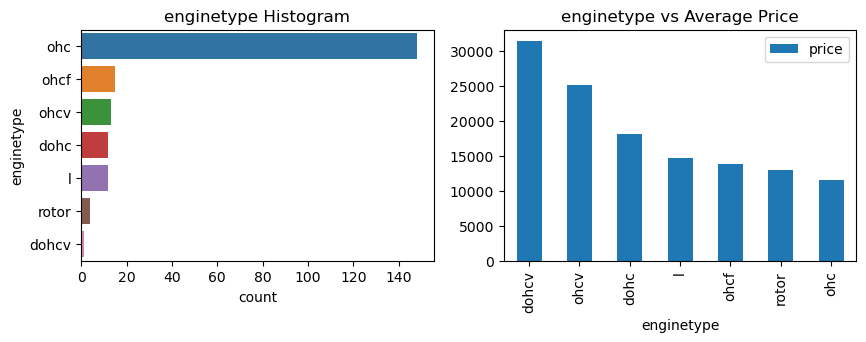

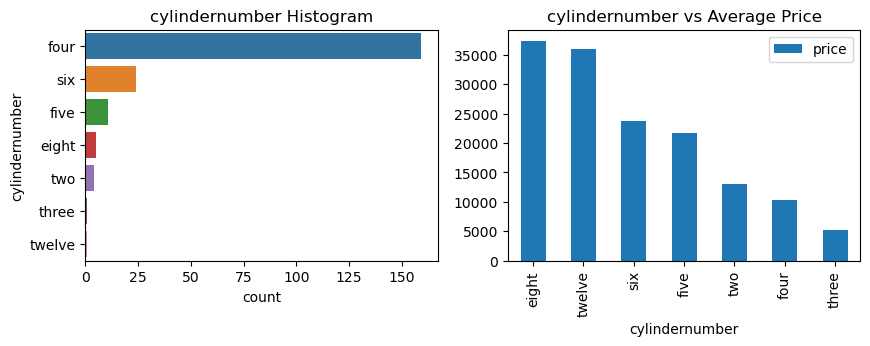

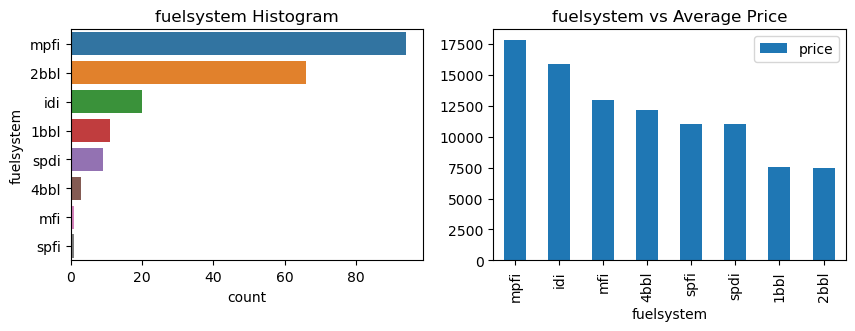

In [32]:
# Visualising Categorical Data

def price_comp(a):
    fig = plt.figure(figsize=(10,3))
    s1=fig.add_subplot(1,2,1)
    s2=fig.add_subplot(1,2,2)

    sns.countplot(data = data,
                  y = a,
                  order = data[a].value_counts().index,
                  ax=s1)
    s1.set_title(a+' Histogram')

    df = pd.DataFrame(data.groupby([a])['price'].mean().sort_values(ascending = False))
    df.plot(kind='bar',ax=s2,)
    plt.title(a+' vs Average Price')
    plt.show()


for columns in categorical_cols[1:]:
    price_comp(columns)


* Toyota is the most prefered car company.
* Jaguar and Buick have highest average price.
* Gas is the most prefered fuel type and average price of gas type vehicle is also less.
* 115 cars has four dooors and 90 cars has 2 doors. Also  there is slight difference in distributions of cars having two doors vs cars having 4 doors
* Sedan is top Car type prefered
* Ohc is prefered engine type and average price of ohc vehicle is the least among all.
* Hardtop and Convertible vehicles are more costlier than others.
* Cars with engine in rear are more than double the average cost of cars with engine in front.
* A four cylinder car is prefered most, eight and twelve cylinder cars are the costliest
* Turbo have higher price range than the std
* Most number of cars having fuel system mpfi and least number of cars having fuel system mfi and spfi

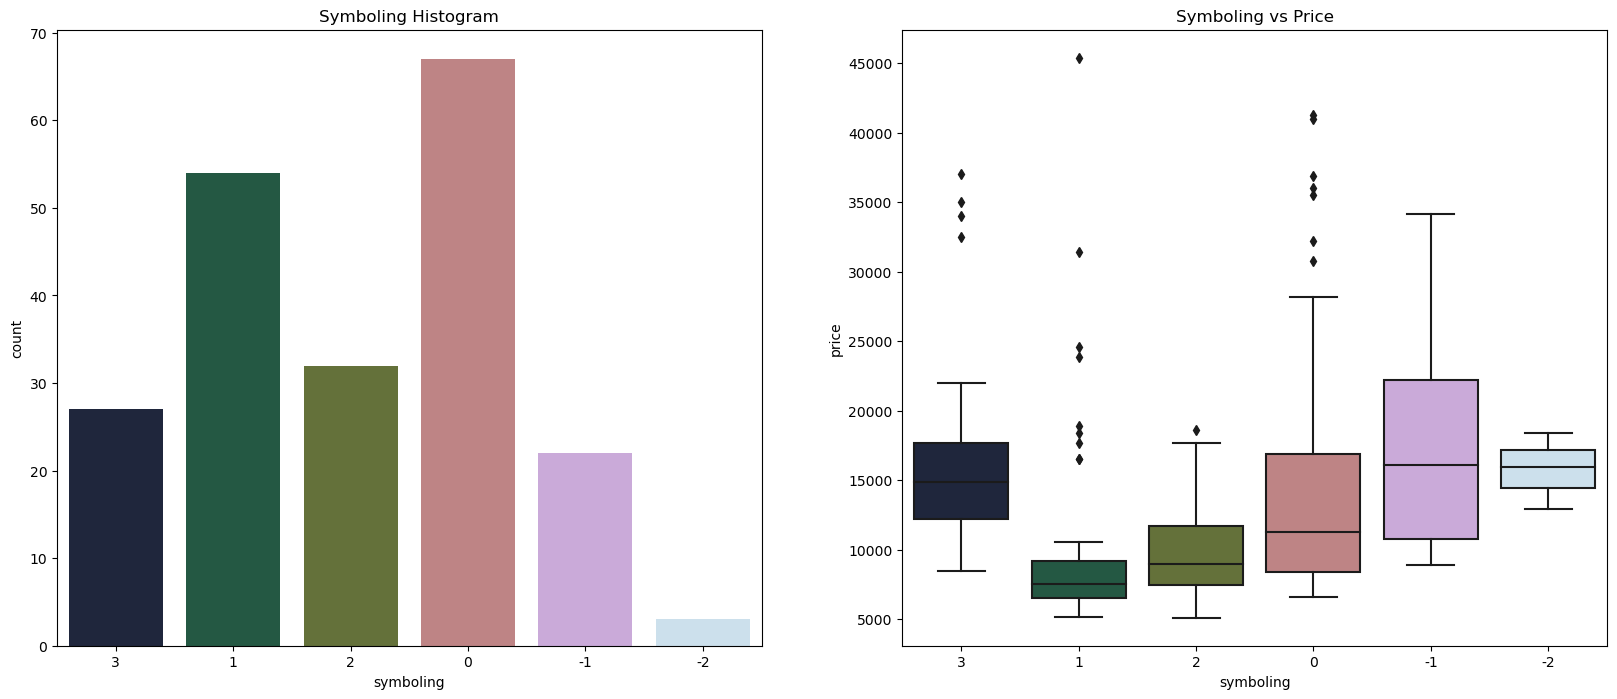

In [33]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(data.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=data.symboling, y=data.price, palette=("cubehelix"))

plt.show()

### Symboling
Cars are initially assigned a risk factor symbol associated with its price.

+3 = risky and -3 = safe

* It seems that the symboling with 0 and 1 values are most sold.
* The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

In [34]:
categorical_cols

Index(['symboling', 'fueltype', 'Company', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

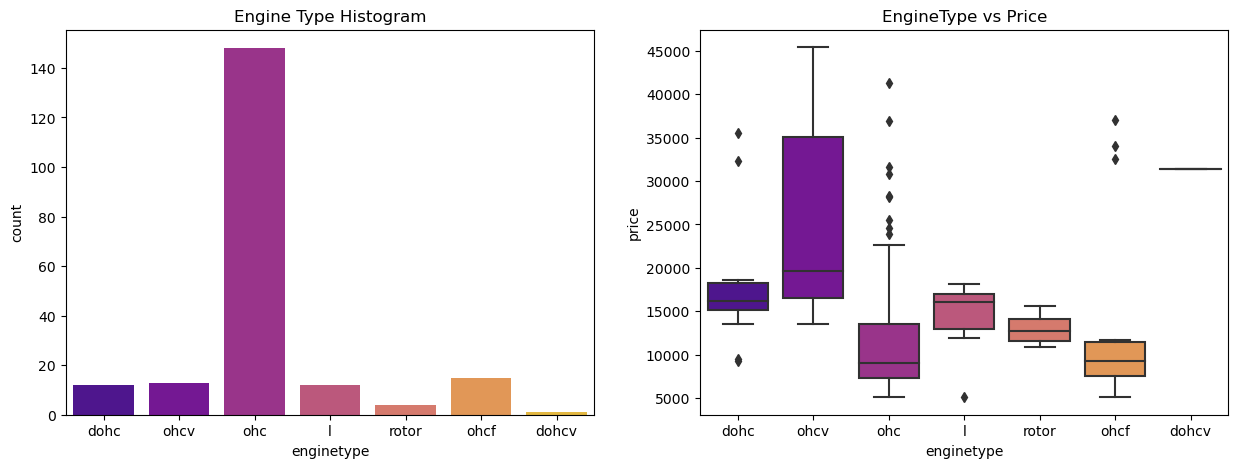

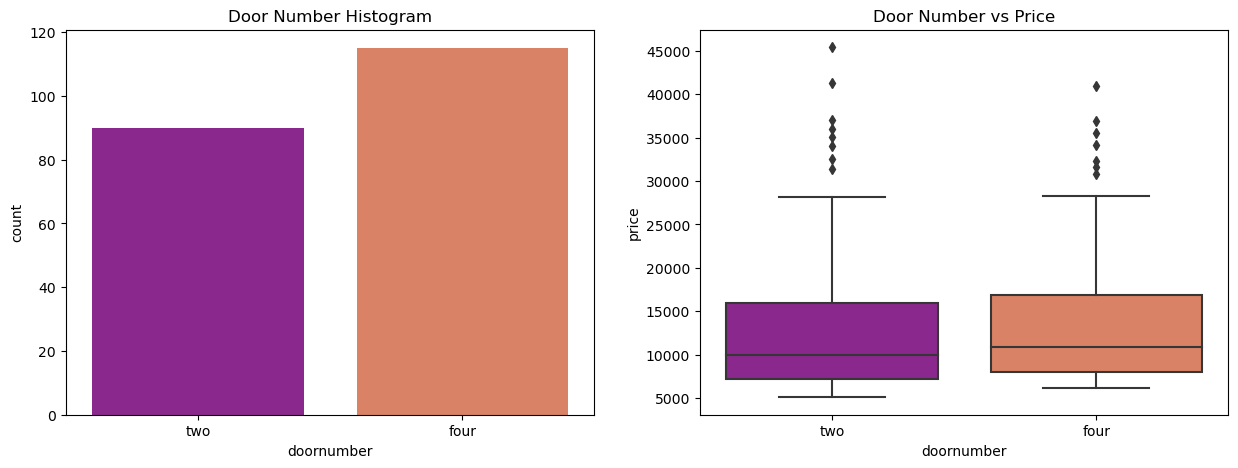

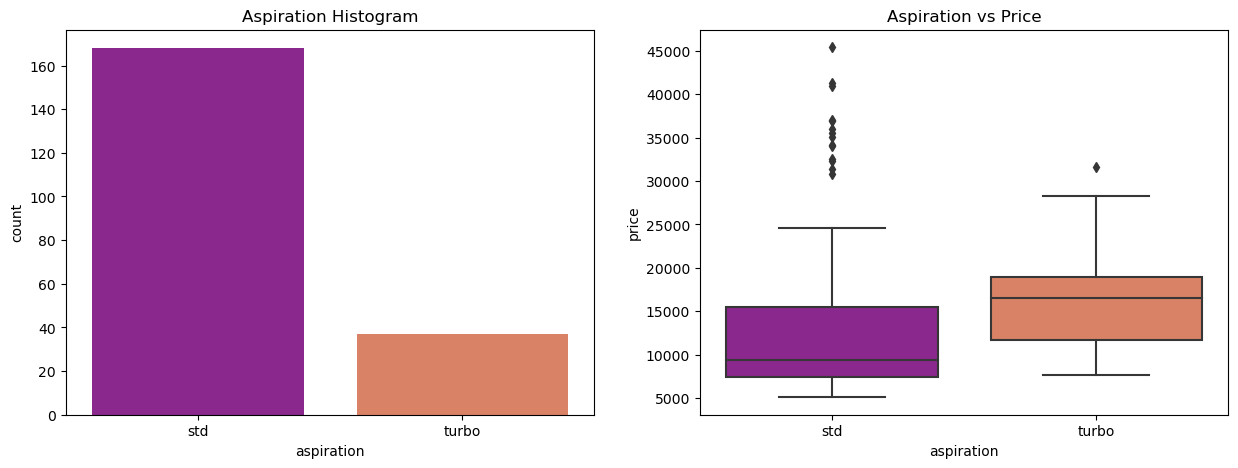

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(data.enginetype, palette=("plasma"))
plt.subplot(1,2,2)
plt.title('EngineType vs Price')
sns.boxplot(x=data.enginetype, y=data.price, palette=("plasma"))
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data.doornumber, palette=("plasma"))
plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=data.doornumber, y=data.price, palette=("plasma"))
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(data.aspiration, palette=("plasma"))
plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=data.aspiration, y=data.price, palette=("plasma"))
plt.show()

1. ohc Engine type seems to be most favored type and ohcv has the highest price range
2. `Door Number` is not affacting the price much. There is no sugnificant difference between the categories
3. turbo have higher price range than the std

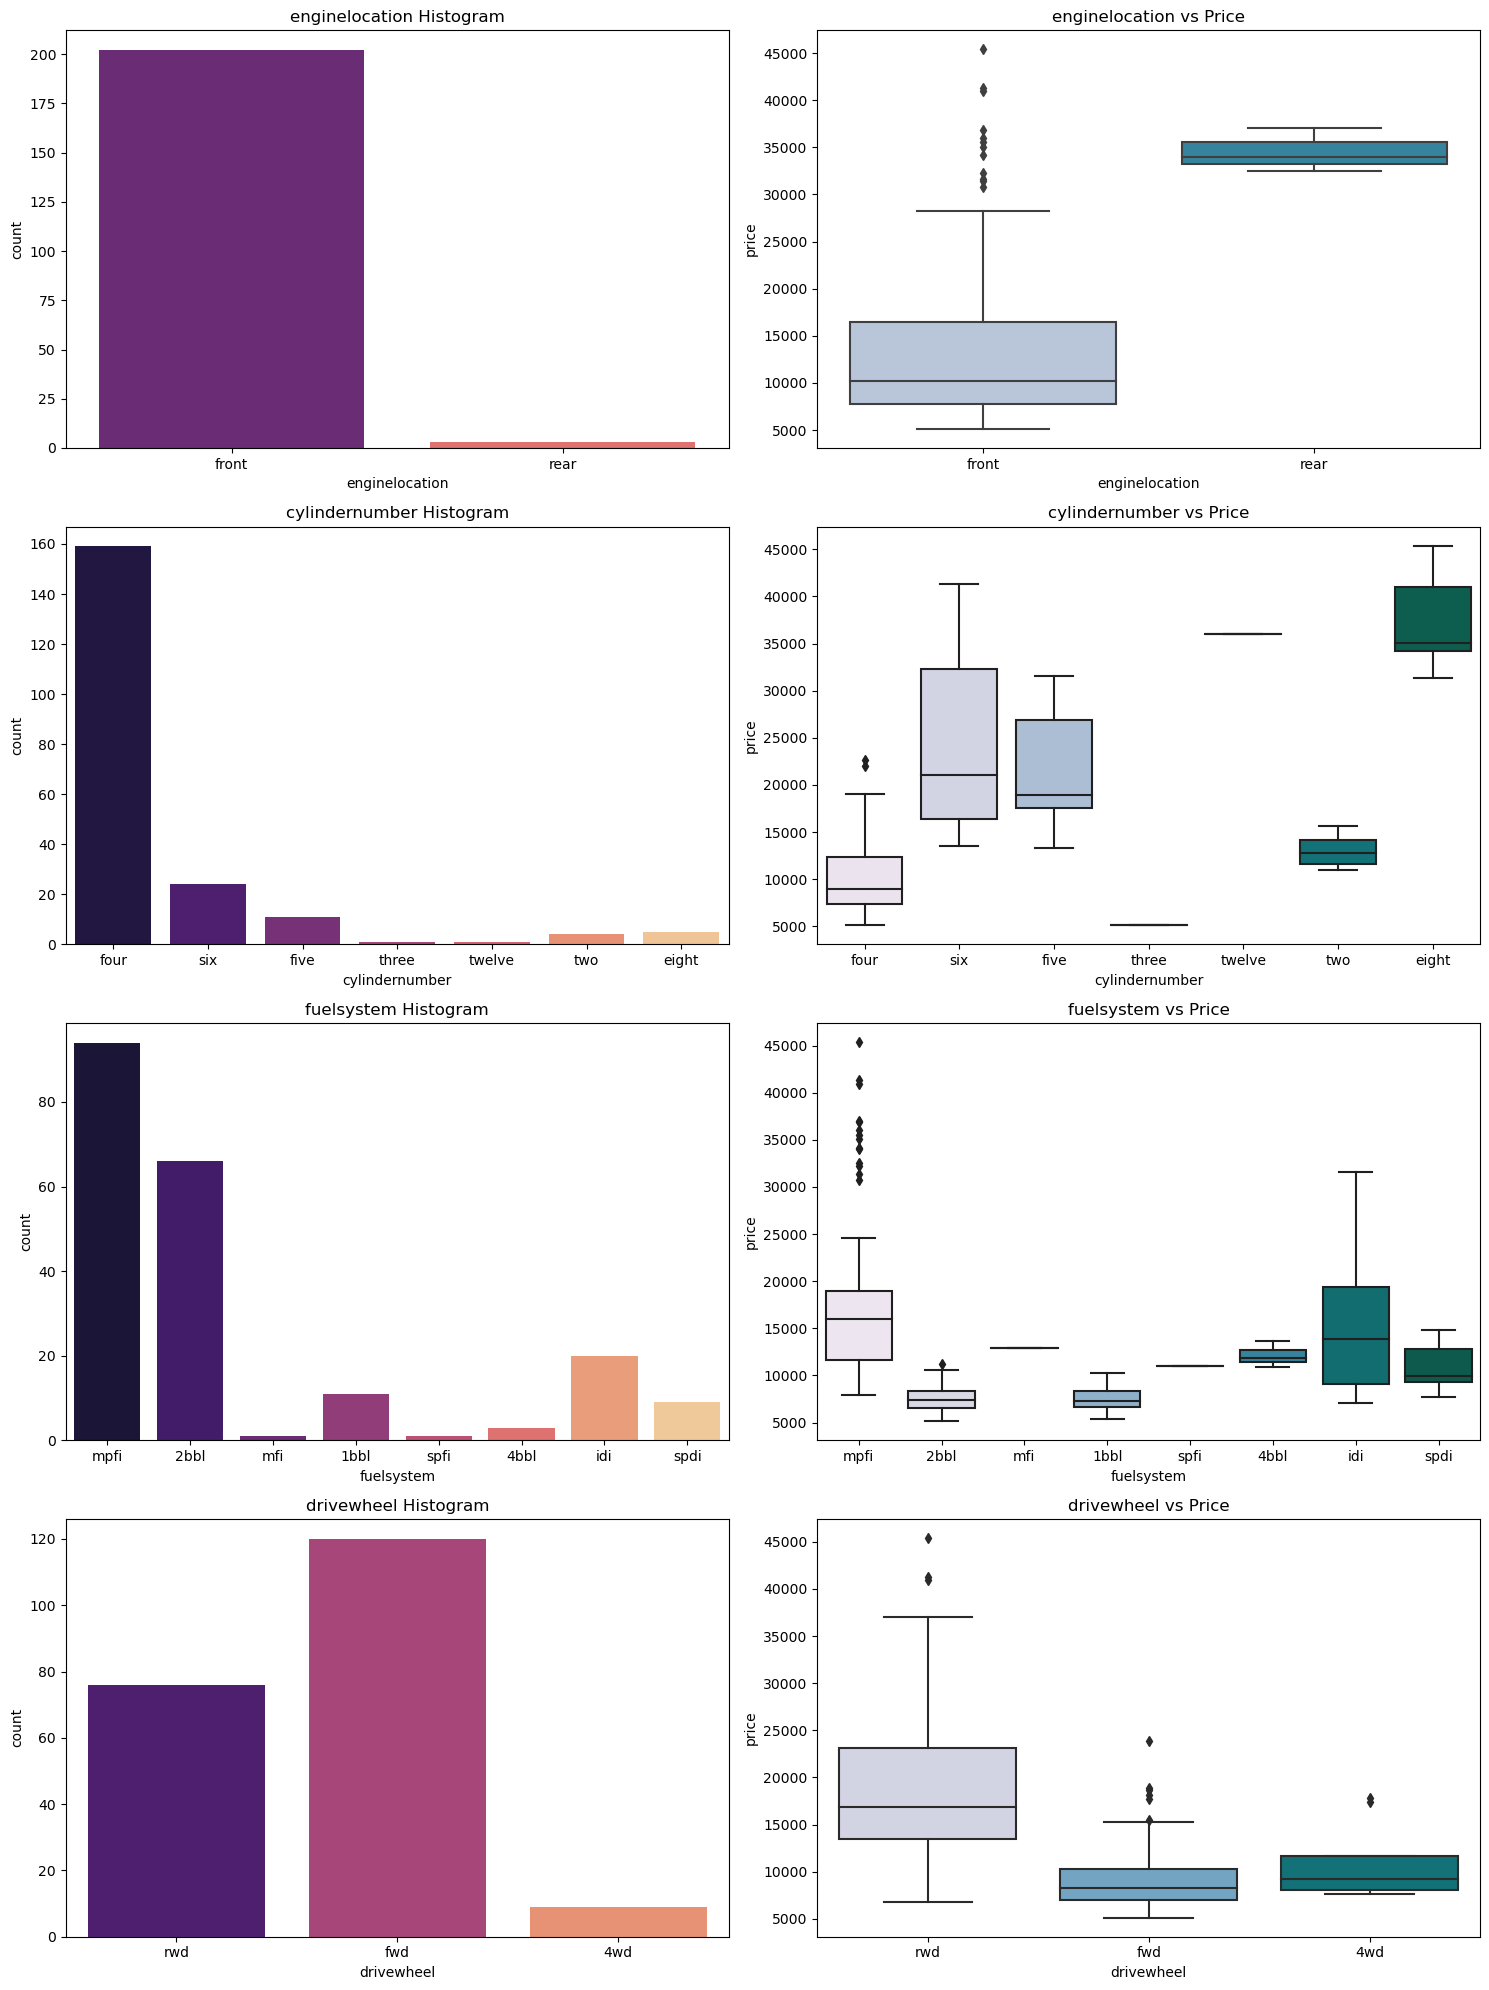

In [36]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=data[x], y=data.price, palette=("PuBuGn"))
    
plt.figure(figsize=(15,20))

cols_boxplot = ['enginelocation',
               'cylindernumber', 'fuelsystem',
               'drivewheel']

i = 1
for columns in cols_boxplot:
    plot_count(columns, i)
    i+=2

plt.tight_layout()


1. Most common number of cylinders are `four`, `six` and `five` and `eight` cylinders have the highest price range.
2. `mpfi` and `2bbl` are most common type of fuel systems. `mpfi` and `idi` having the highest price range.
3. Most high ranged cars seeme to prefer rwd drivewheel.

#### Visualising Numerical Data

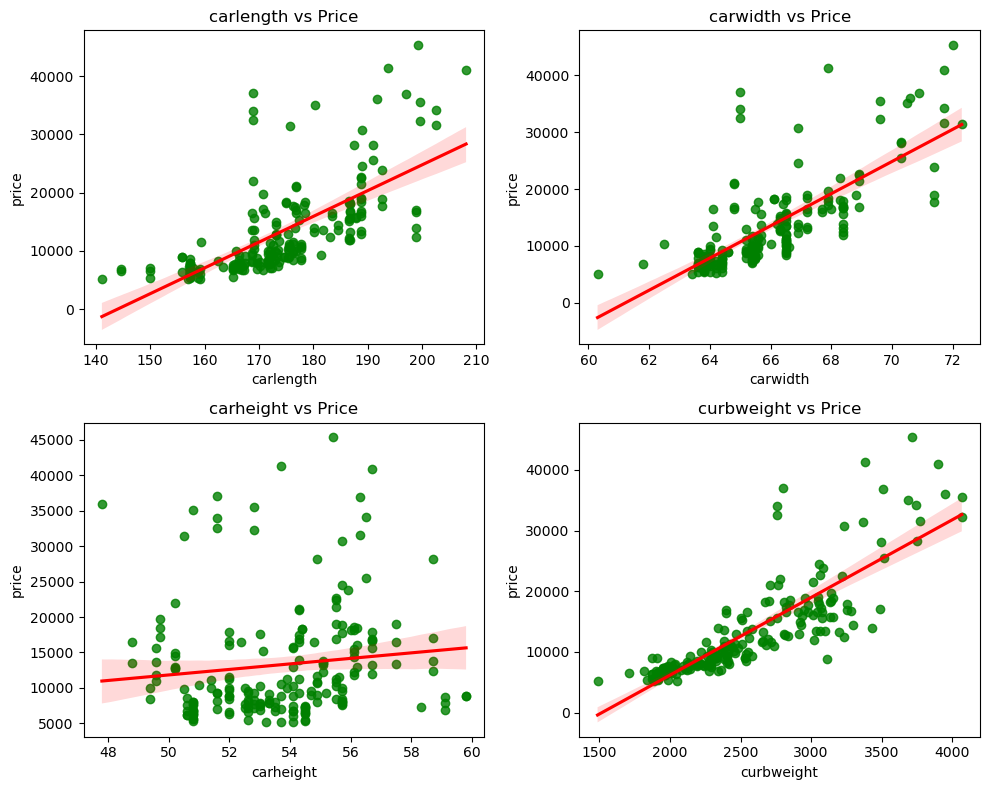

In [37]:
# Visualising Numerical Data

def scatter(x,fig):
    plt.subplot(2,2,fig)
    sns.regplot(x=x, y="price", 
                data=data,color='g', 
                line_kws={"color": "red"})
    plt.title(x+' vs Price')

plt.figure(figsize=(10,8))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

* `carwidth`, `carlength` and `curbweight` have a poitive correlation with `price`.
* `carheight` doesn't have correlation with price.

In [38]:
numerical_cols

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

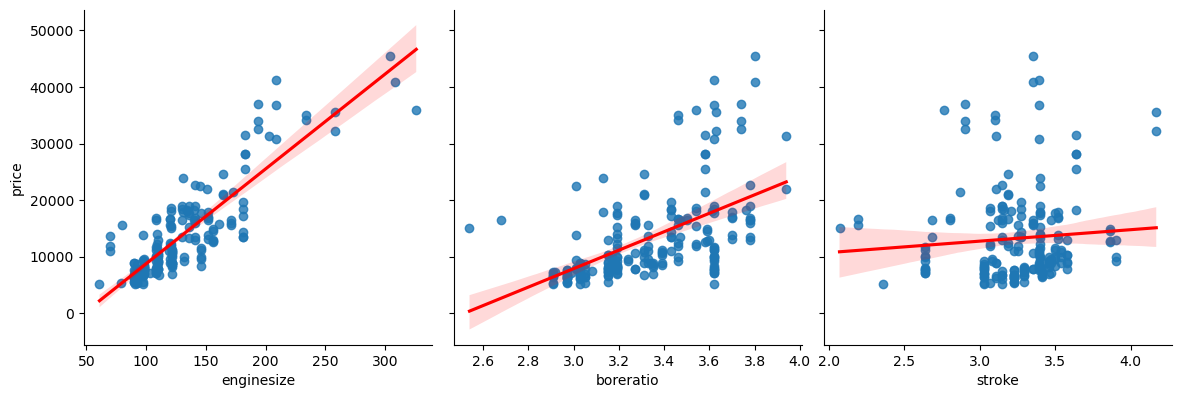

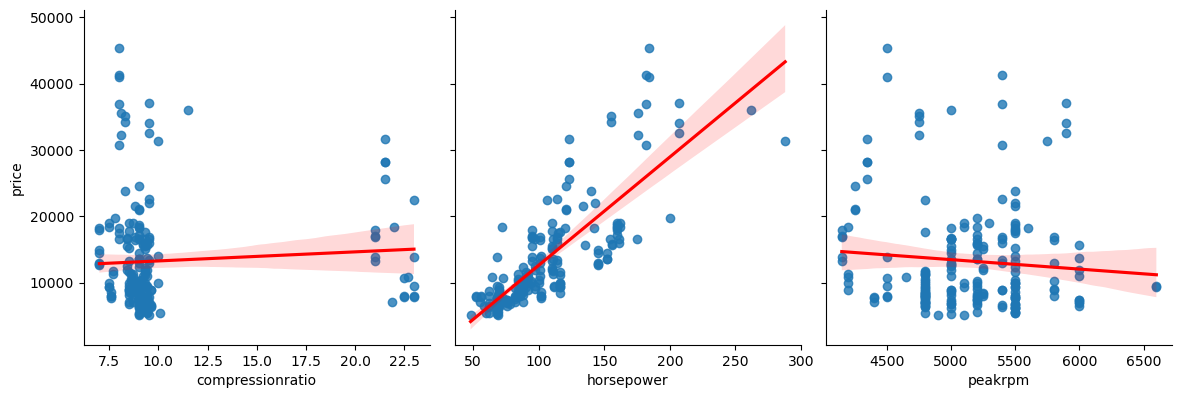

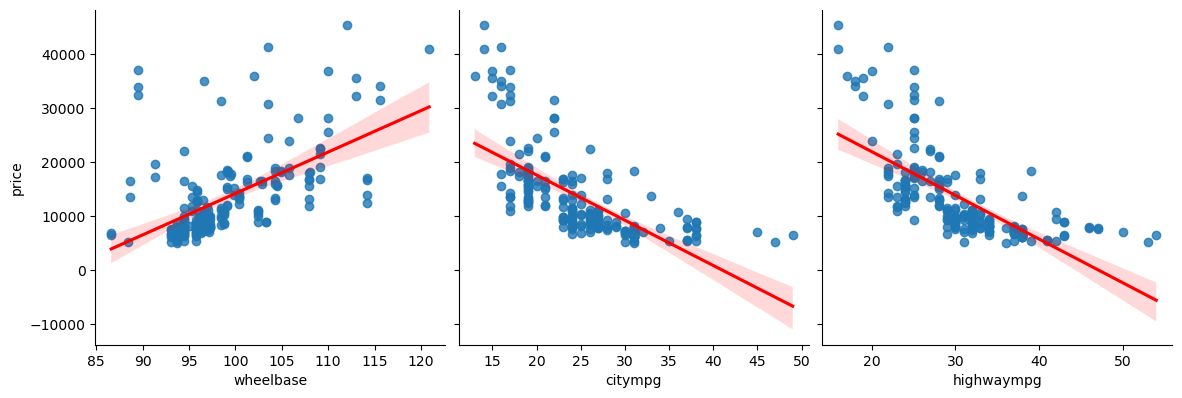

In [39]:
def pp(x,y,z):
    sns.pairplot(data, 
                 x_vars=[x,y,z], 
                 y_vars='price',
                 height=4, 
                 aspect=1, 
                 kind='reg',
                plot_kws={'line_kws':{'color':'red'}})
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

* `enginesize`, `boreratio`, `horsepower`, `wheelbase` - have a positive correlation with `price`.
* `citympg`, `highwaympg` - have a negative correlation with `price`.

#### Deriving new features

In [40]:
#Fuel economy
data['fueleconomy'] = (0.55 * data['citympg']) + (0.45 * data['highwaympg'])

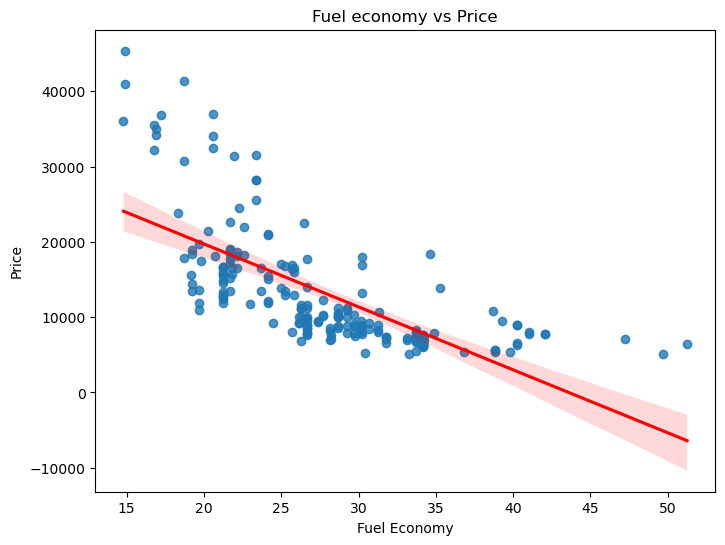

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.regplot(x=data['fueleconomy'],
            y=data['price'],
           line_kws={"color": "red"})
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

`fueleconomy` has negative correlation with price.

In [42]:
#Binning the Car Companies based on avg prices of each Company.
data['price'] = data['price'].astype('int')
temp = data.copy()
table = temp.groupby(['Company'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='Company')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
data['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
data.head()

,symboling,fueltype,Company,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [43]:
numerical_cols

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [44]:
for columns in numerical_cols:
    print(columns)

wheelbase
carlength
carwidth
carheight
curbweight
enginesize
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price


### List of significant features after Visual analysis :
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy

In [45]:
data_new = data[['price', 'fueltype', 'aspiration','carbody', 
                 'drivewheel','wheelbase','curbweight', 'enginetype', 
                 'cylindernumber', 'enginesize', 'boreratio',
                 'horsepower', 'fueleconomy', 'carlength',
                 'carwidth', 'carsrange']]
data_new.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


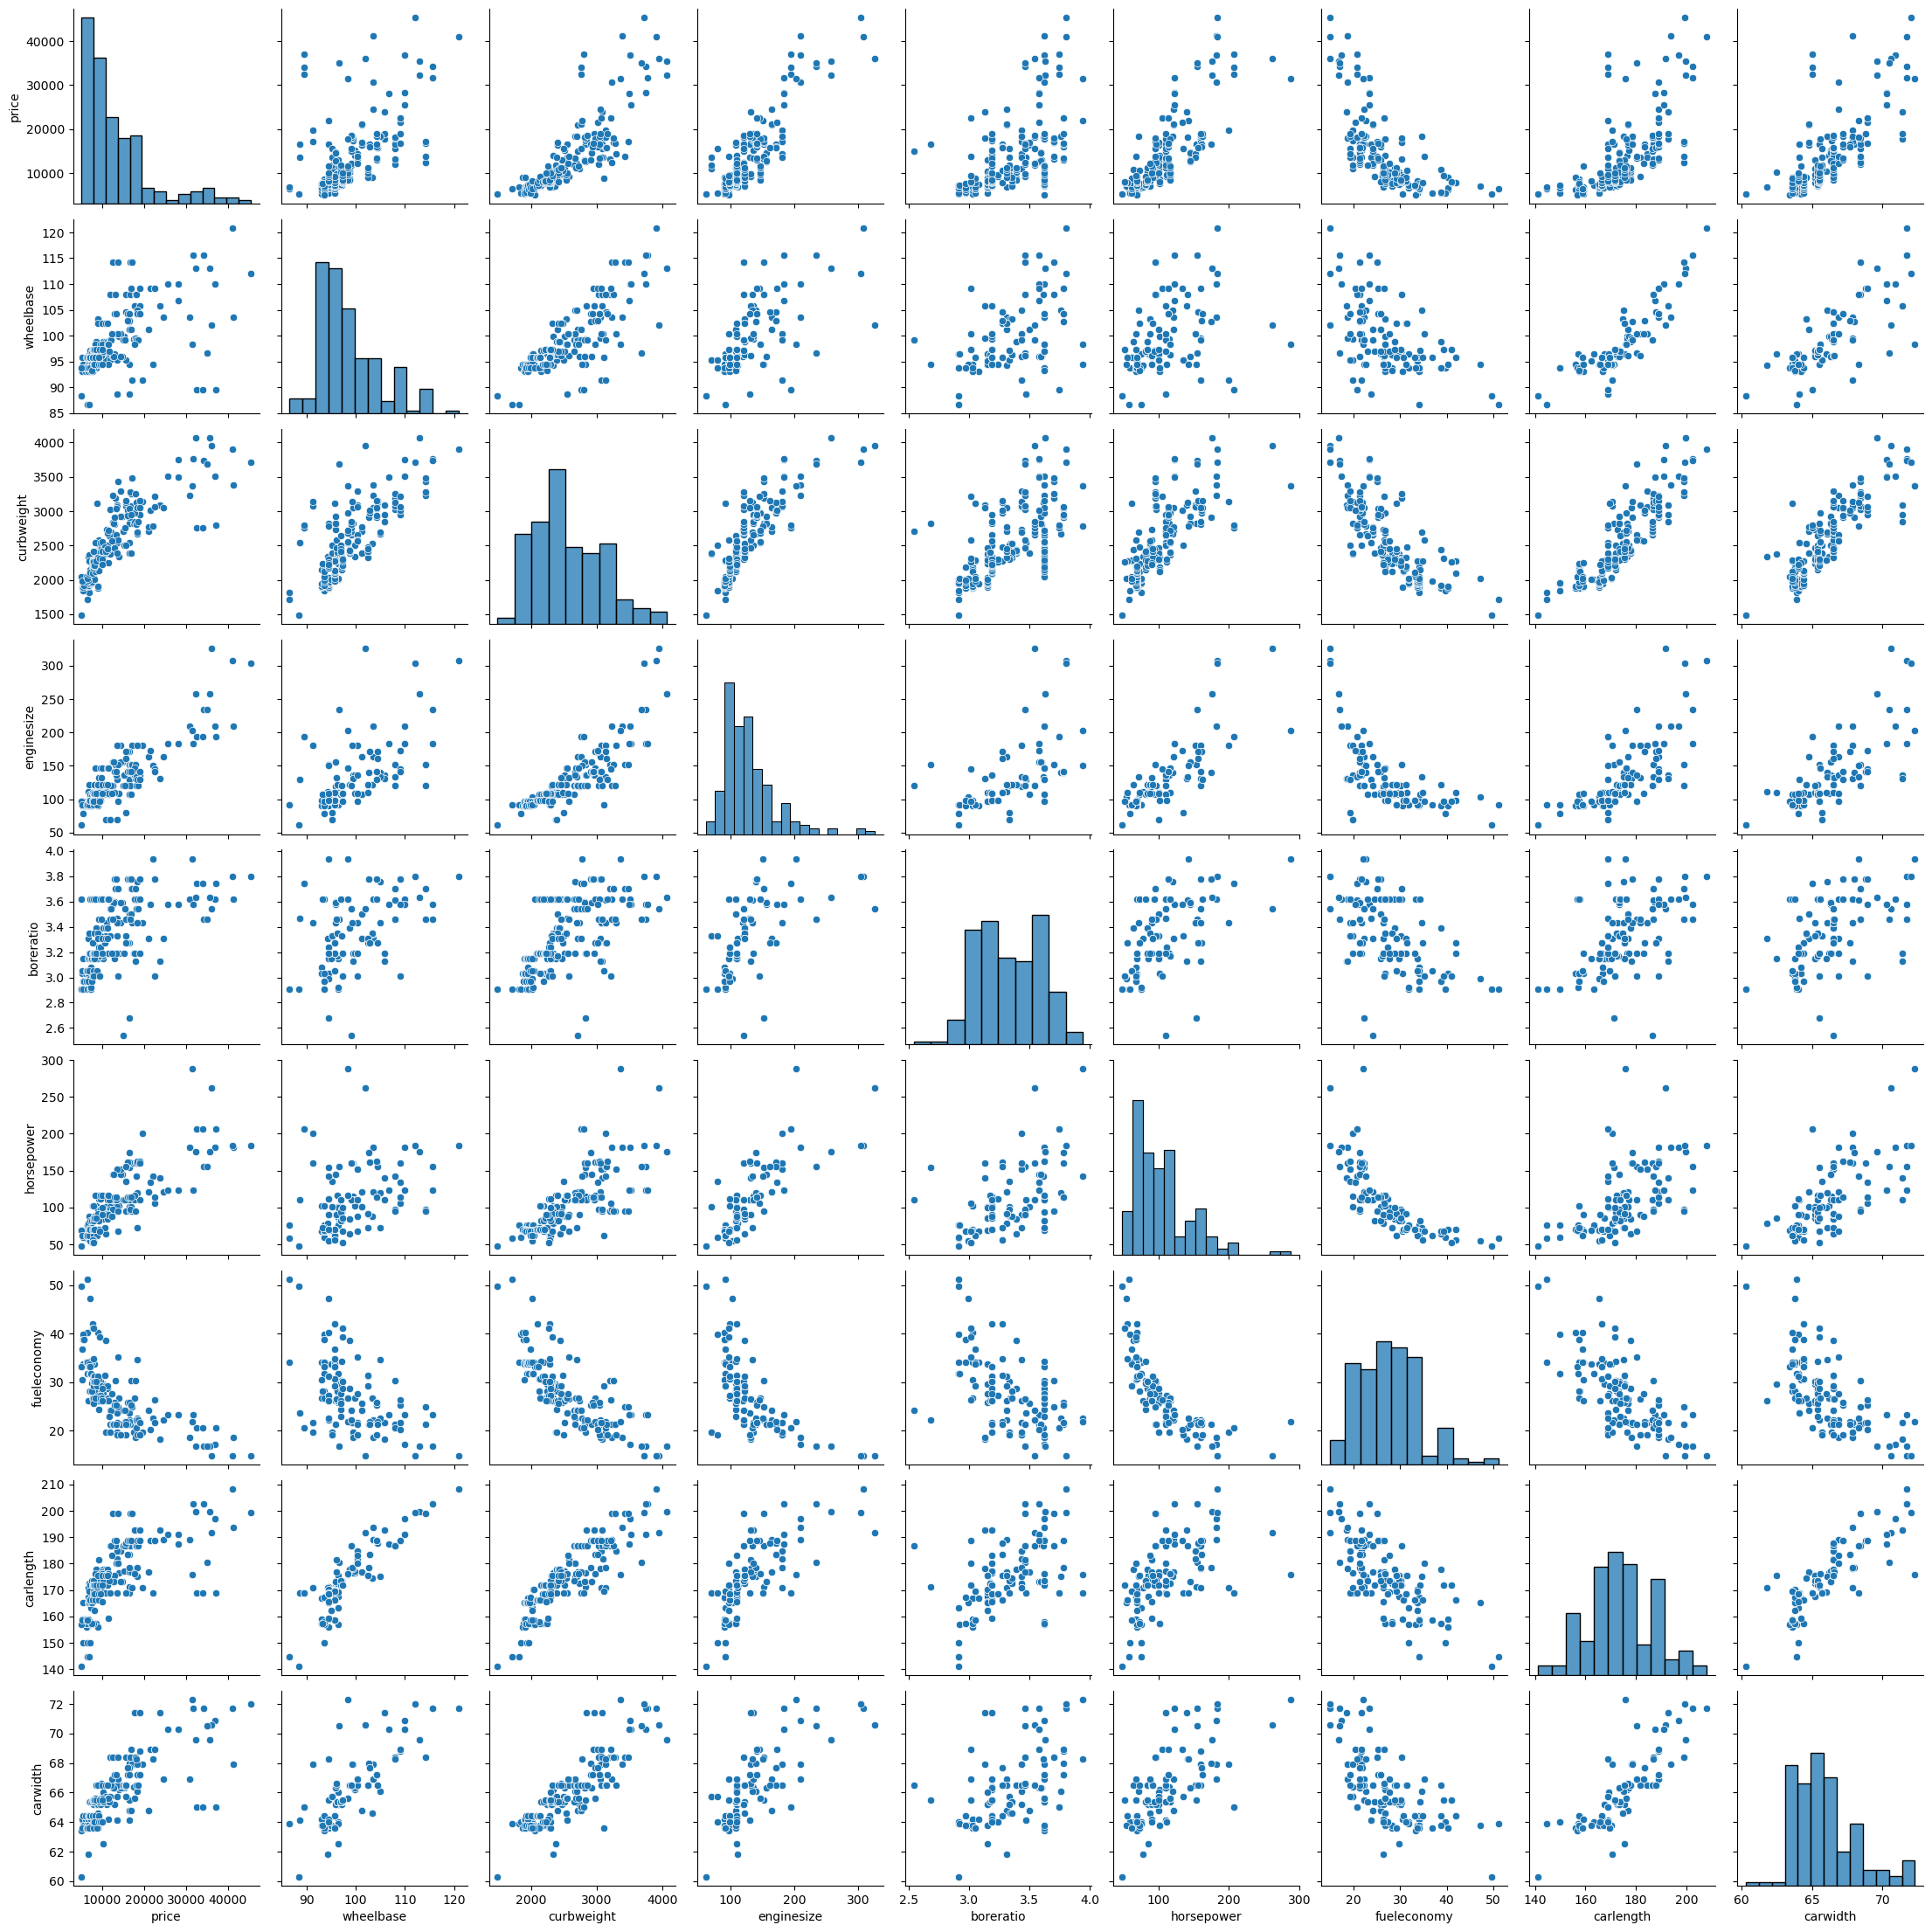

In [46]:
sns.pairplot(data_new)
plt.show()

#### Dummy Variables

In [47]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df


data_new = dummies('fueltype',data_new)
data_new = dummies('aspiration',data_new)
data_new = dummies('carbody',data_new)
data_new = dummies('drivewheel',data_new)
data_new = dummies('enginetype',data_new)
data_new = dummies('cylindernumber',data_new)
data_new = dummies('carsrange',data_new)

data_new.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [48]:
data_new.shape

(205, 31)

In [49]:
data_new.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'Medium', 'Highend'],
      dtype='object')

In [50]:
new_numerical_cols = data_new.select_dtypes(exclude='object').columns
new_numerical_cols

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'Medium', 'Highend'],
      dtype='object')

In [51]:
len(new_numerical_cols)

31

<AxesSubplot:>

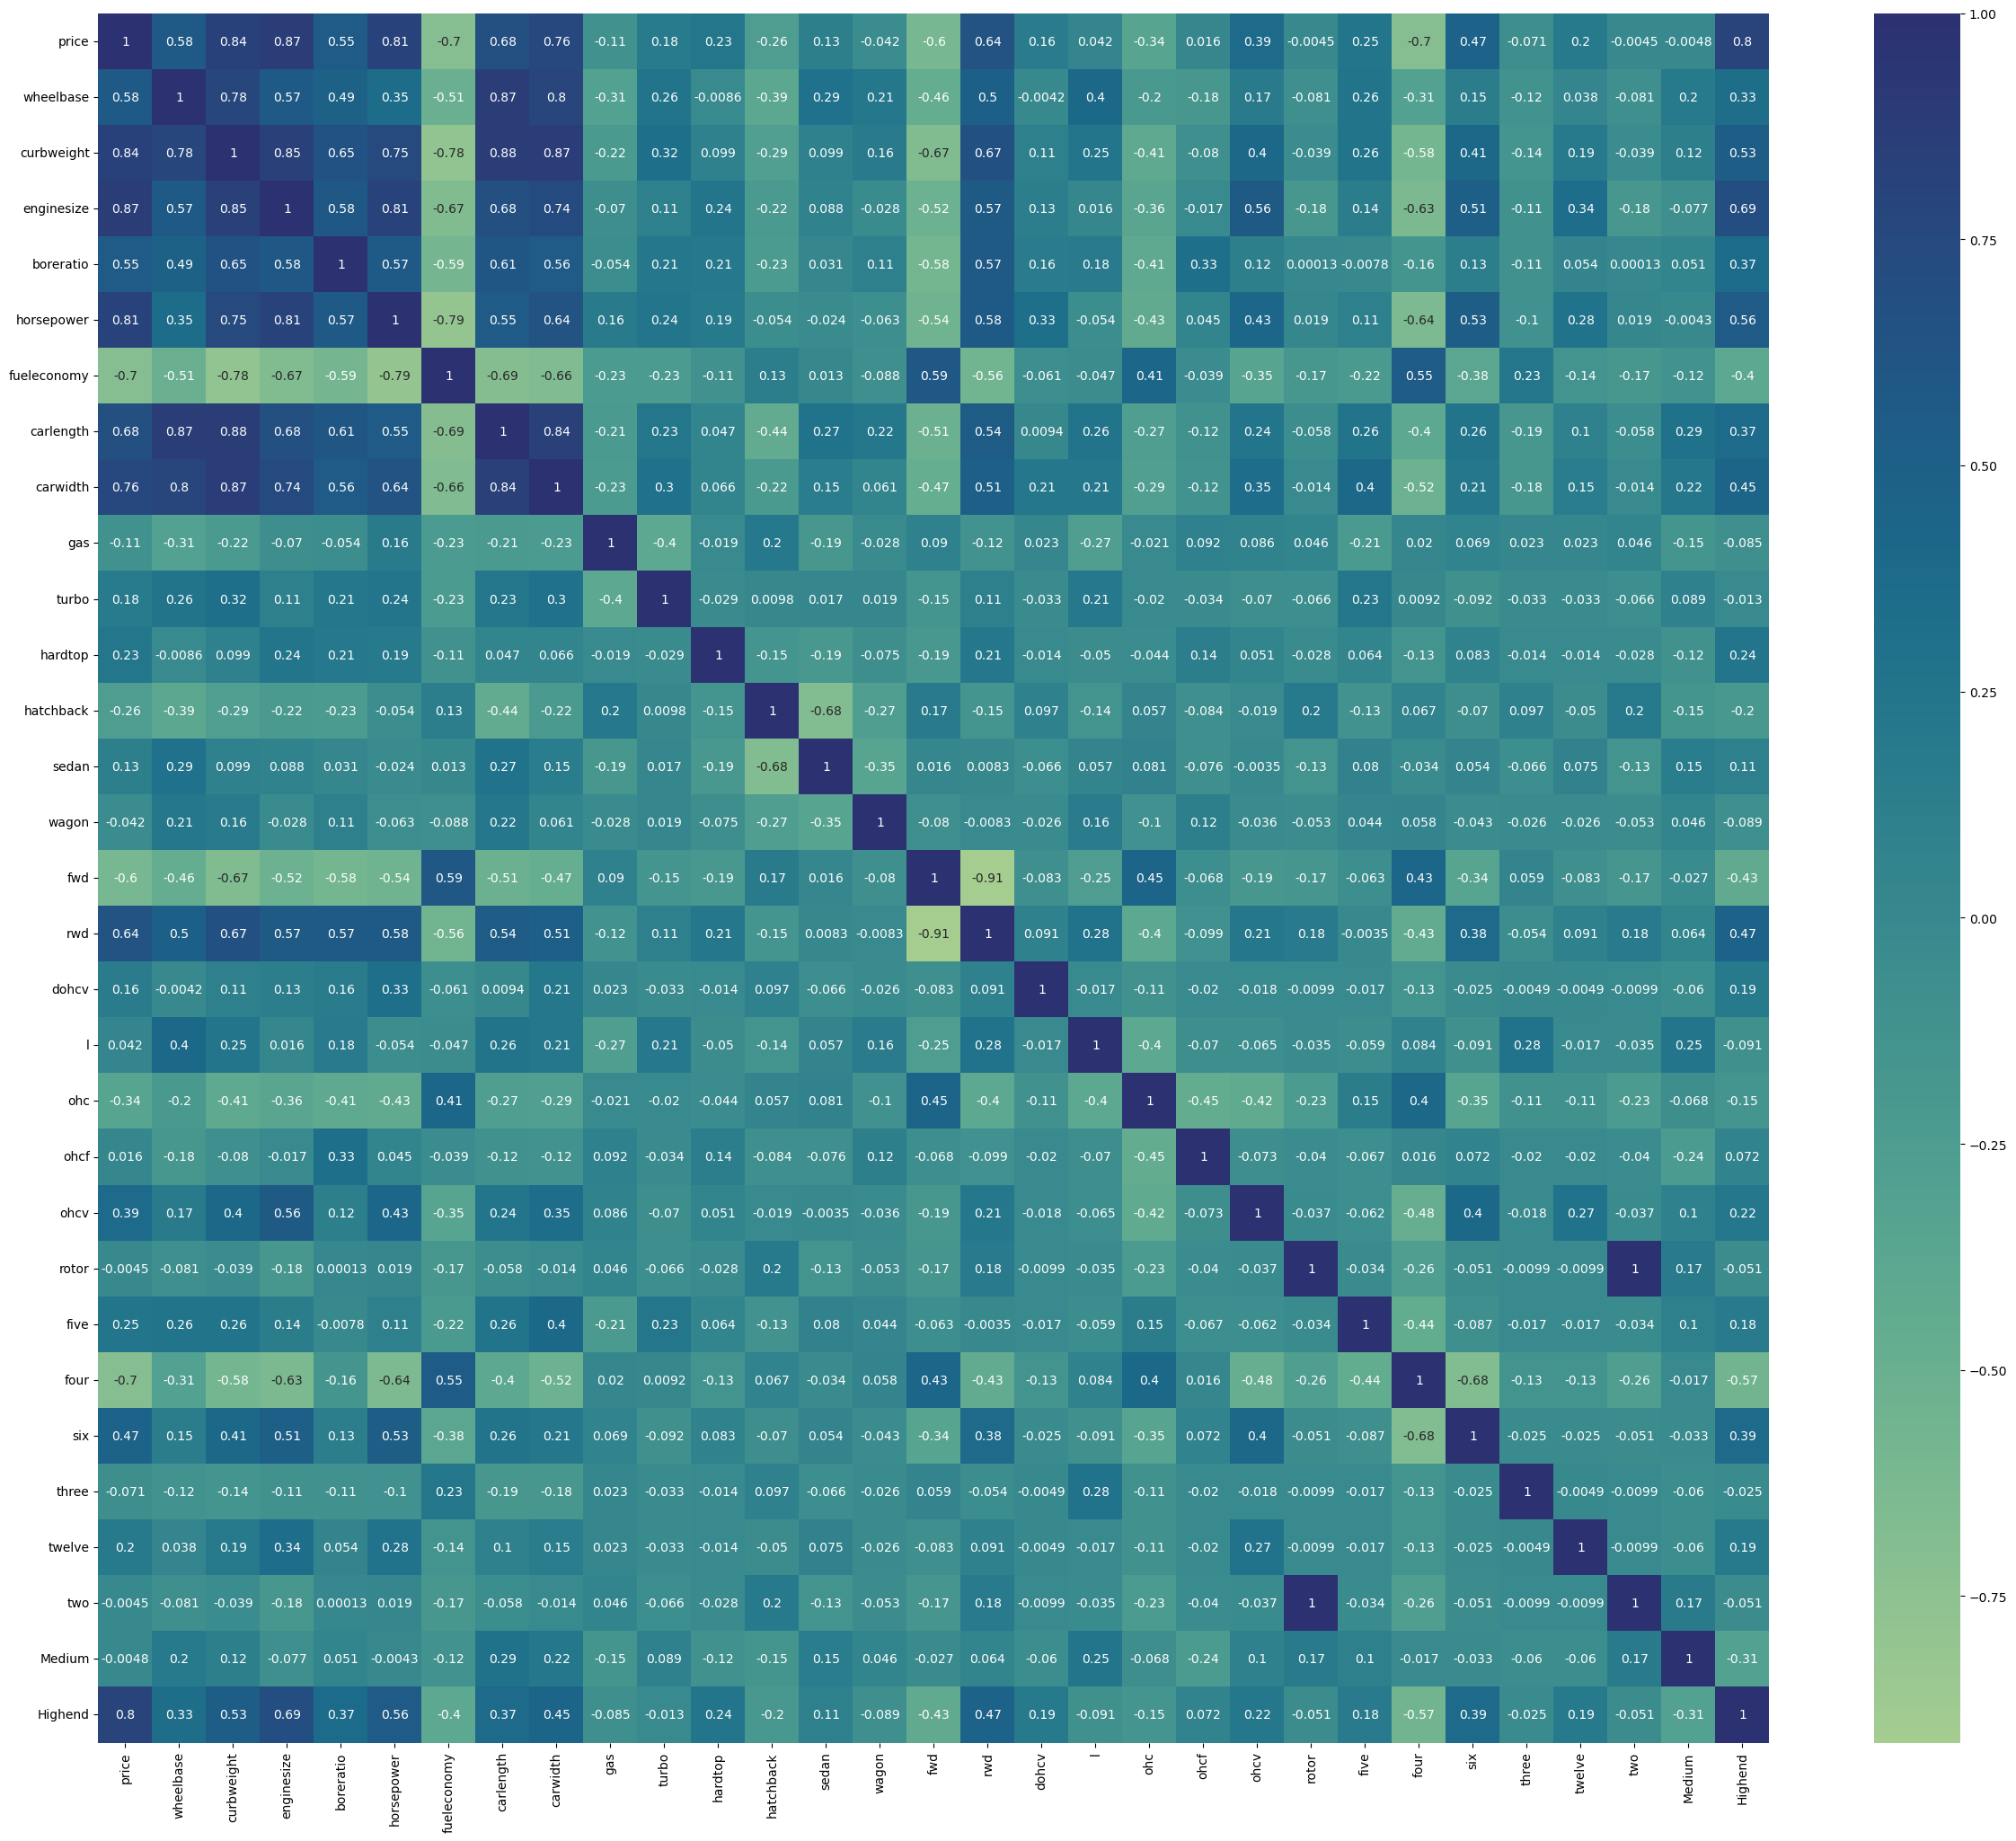

In [52]:
# Correlation Matrix
plt.figure(figsize=(30,25)) 
sns.heatmap(data_new.corr(), 
            annot=True,
           cmap="crest")

Highly correlated variables to price are - `curbweight`, `enginesize`, `horsepower`,`carwidth` and `highend`.

In [53]:
X = data_new.drop('price',axis=1)
y = data.price

#### Train-Test Split and feature scaling

In [54]:
from sklearn.model_selection import train_test_split

# np.random.seed(0)
x_train,x_test,y_train,y_test = train_test_split(X, y,
                                                 test_size=0.33, 
                                                 random_state = 45)

### 4. Modelling and Evaluation

#### Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
lreg.score(x_test,y_test)

0.8931690678975603

#### Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.8960134171648382

#### Random Forest regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


Rf.score(x_test, y_test)

0.905151096019076

### Conclusion

#### Random forest performing best (with accuracy ~ 0.90)